In [ ]:
# hide
%load_ext autoreload
%autoreload 2

# USPTO data Exploration

> Looking into the USPTOyield data

In [ ]:
# hide 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
# hide
default_plot_kwargs = {
    'color': '#541FA3',
}
title_fontsize = 18
label_fontsize = 16

## Getting the data files

The USPTO yields data files are too large to be uploaded to this GitHub repo and have to be downloaded from this [Box folder](https://ibm.ent.box.com/v/uspto-yields-data) and placed into `../data/uspto`. The data was extracted from the data set published by Lowe [Chemical reactions from US patents (1976-Sep2016)](https://figshare.com/articles/Chemical_reactions_from_US_patents_1976-Sep2016_/5104873), which has catalized research on ML for chemical reactions in recent years.

## USPTO data - mass scales

We observed that `milligram scale` and `gram scale` reactions had different yield distributions. Gram scale reaction are often optimized, whereas milligram scale are not optimized and yields might be often lower. In academia predicting the non-optimized yield is more relevant. Therefore, we splitted the USPTO reactions, which contained yield and product mass information into two categories (gram, milligram) at a threshold of 1 gram. 

In [ ]:
# data
gram_df = pd.read_csv('../data/uspto/yields_above_200622.tsv', sep='\t', index_col=0)
gram_df['calc_yield'] = gram_df.calc_yield_above

milligram_df = pd.read_csv('../data/uspto/yields_below_200622.tsv', sep='\t', index_col=0)
milligram_df['calc_yield'] = milligram_df.calc_yield_below

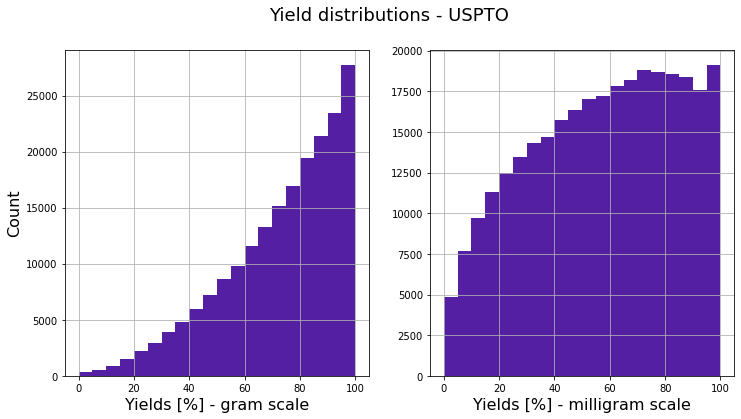

In [ ]:
# data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('Yield distributions - USPTO', fontsize=title_fontsize)
ax1.set_ylabel('Count', fontsize=label_fontsize)
ax1.set_xlabel('Yields [%] - gram scale', fontsize=label_fontsize)
gram_df.calc_yield.hist(bins=20, ax=ax1, **default_plot_kwargs)
ax2.set_xlabel('Yields [%] - milligram scale', fontsize=label_fontsize)
milligram_df.calc_yield.hist(bins=20, ax=ax2, **default_plot_kwargs)

In [ ]:
# hide
# data
# fig.tight_layout()
fig.savefig('images/uspto_yield_distributions.pdf')
fig.savefig('images/uspto_yield_distributions.png')

In [ ]:
# data
pd.concat([gram_df['calc_yield'].describe(),milligram_df['calc_yield'].describe()], axis=1)

calc_yield     calc_yield
count  197619.000000  302040.000000
mean       73.232436      56.841559
std        20.942848      26.642160
min         0.000000       0.000000
25%        60.200000      35.500000
50%        78.000000      58.900000
75%        90.300000      79.500000
max       100.000000     100.000000

### Prepare the data

In [ ]:
# data
milligram_df['rxn'] = milligram_df.tokenized_reactants_inputs.str.replace(' ', '') + '>>' + milligram_df.tokenized_products_inputs.str.replace(' ', '')
milligram_df['scaled_yield'] = milligram_df.calc_yield / 100
milligram_train_random_split_df = milligram_df[milligram_df.random_split=='train'][['rxn', 'scaled_yield']].sample(frac=1., random_state=42)
milligram_test_random_split_df = milligram_df[milligram_df.random_split=='test'][['rxn', 'scaled_yield']]
milligram_train_time_split_df = milligram_df[milligram_df.time_split=='train'][['rxn', 'scaled_yield']].sample(frac=1., random_state=42)
milligram_test_time_split_df = milligram_df[milligram_df.time_split=='test'][['rxn', 'scaled_yield']]

In [ ]:
#hide
# data
milligram_train_random_split_df.to_csv('../data/uspto/milligram_train_random_split.tsv', sep='\t')
milligram_test_random_split_df.to_csv('../data/uspto/milligram_test_random_split.tsv', sep='\t')
milligram_train_time_split_df.to_csv('../data/uspto/milligram_train_time_split.tsv', sep='\t')
milligram_test_time_split_df.to_csv('../data/uspto/milligram_test_time_split.tsv', sep='\t')

### Gram scale 

In [ ]:
# data
gram_df['rxn'] = gram_df.tokenized_reactants_inputs.str.replace(' ', '') + '>>' + gram_df.tokenized_products_inputs.str.replace(' ', '')
gram_df['scaled_yield'] = gram_df.calc_yield / 100
gram_train_random_split_df = gram_df[gram_df.random_split=='train'][['rxn', 'scaled_yield']].sample(frac=1., random_state=42)
gram_test_random_split_df = gram_df[gram_df.random_split=='test'][['rxn', 'scaled_yield']]
gram_train_time_split_df = gram_df[gram_df.time_split=='train'][['rxn', 'scaled_yield']].sample(frac=1., random_state=42)
gram_test_time_split_df = gram_df[gram_df.time_split=='test'][['rxn', 'scaled_yield']]

In [ ]:
#hide
# data
gram_train_random_split_df.to_csv('../data/uspto/gram_train_random_split.tsv', sep='\t')
gram_test_random_split_df.to_csv('../data/uspto/gram_test_random_split.tsv', sep='\t')
gram_train_time_split_df.to_csv('../data/uspto/gram_train_time_split.tsv', sep='\t')
gram_test_time_split_df.to_csv('../data/uspto/gram_test_time_split.tsv', sep='\t')

### USPTO - smoothed 

In [ ]:
# data
gram_df = pd.read_csv('../data/uspto/yields_above_200622.tsv', sep='\t', index_col=0)
gram_smoothed_df = pd.read_csv('../data/uspto/yields_above_smooth_200622.tsv', sep='\t', index_col=0) 
gram_df['calc_yield'] = gram_smoothed_df['4NN-2'].values
milligram_df = pd.read_csv('../data/uspto/yields_below_200622.tsv', sep='\t', index_col=0)
milligram_smoothed_df = pd.read_csv('../data/uspto/yields_below_smooth_200622.tsv', sep='\t', index_col=0)

milligram_df['calc_yield'] = milligram_smoothed_df['4NN-2'].values

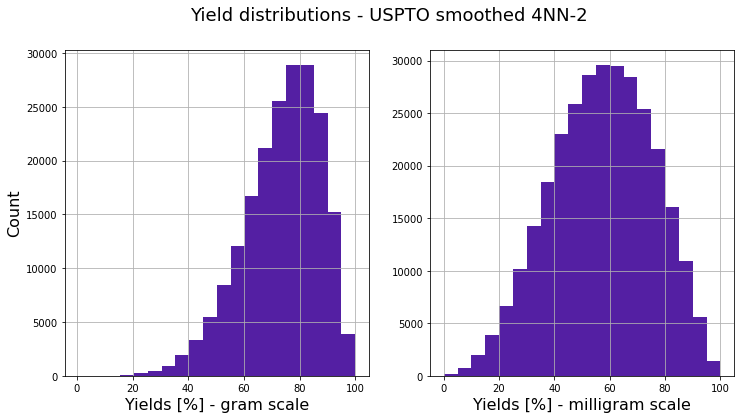

In [ ]:
# data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('Yield distributions - USPTO smoothed 4NN-2', fontsize=title_fontsize)
ax1.set_ylabel('Count', fontsize=label_fontsize)
ax1.set_xlabel('Yields [%] - gram scale', fontsize=label_fontsize)
gram_df.calc_yield.hist(bins=20, ax=ax1, **default_plot_kwargs)
ax2.set_xlabel('Yields [%] - milligram scale', fontsize=label_fontsize)
milligram_df.calc_yield.hist(bins=20, ax=ax2, **default_plot_kwargs)

In [ ]:
# hide
# data
# fig.tight_layout()
fig.savefig('images/uspto_yield_distributions_4nn-2.pdf')
fig.savefig('images/uspto_yield_distributions_4nn-2.png')

In [ ]:
#hide
# data

milligram_df['rxn'] = milligram_df.tokenized_reactants_inputs.str.replace(' ', '') + '>>' + milligram_df.tokenized_products_inputs.str.replace(' ', '')
milligram_df['scaled_yield'] = milligram_df.calc_yield / 100
milligram_train_random_split_df = milligram_df[milligram_df.random_split=='train'][['rxn', 'scaled_yield']].sample(frac=1., random_state=42)
milligram_test_random_split_df = milligram_df[milligram_df.random_split=='test'][['rxn', 'scaled_yield']]
milligram_train_time_split_df = milligram_df[milligram_df.time_split=='train'][['rxn', 'scaled_yield']].sample(frac=1., random_state=42)
milligram_test_time_split_df = milligram_df[milligram_df.time_split=='test'][['rxn', 'scaled_yield']]


milligram_train_random_split_df.to_csv('../data/uspto/milligram_smooth_train_random_split.tsv', sep='\t')
milligram_test_random_split_df.to_csv('../data/uspto/milligram_smooth_test_random_split.tsv', sep='\t')
milligram_train_time_split_df.to_csv('../data/uspto/milligram_smooth_train_time_split.tsv', sep='\t')
milligram_test_time_split_df.to_csv('../data/uspto/milligram_smooth_test_time_split.tsv', sep='\t')

In [ ]:
#hide
# data
gram_df['rxn'] = gram_df.tokenized_reactants_inputs.str.replace(' ', '') + '>>' + gram_df.tokenized_products_inputs.str.replace(' ', '')
gram_df['scaled_yield'] = gram_df.calc_yield / 100
gram_train_random_split_df = gram_df[gram_df.random_split=='train'][['rxn', 'scaled_yield']].sample(frac=1., random_state=42)
gram_test_random_split_df = gram_df[gram_df.random_split=='test'][['rxn', 'scaled_yield']]
gram_train_time_split_df = gram_df[gram_df.time_split=='train'][['rxn', 'scaled_yield']].sample(frac=1., random_state=42)
gram_test_time_split_df = gram_df[gram_df.time_split=='test'][['rxn', 'scaled_yield']]

gram_train_random_split_df.to_csv('../data/uspto/gram_smooth_train_random_split.tsv', sep='\t')
gram_test_random_split_df.to_csv('../data/uspto/gram_smooth_test_random_split.tsv', sep='\t')
gram_train_time_split_df.to_csv('../data/uspto/gram_smooth_train_time_split.tsv', sep='\t')
gram_test_time_split_df.to_csv('../data/uspto/gram_smooth_test_time_split.tsv', sep='\t')